## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import os



# Study data files
mouse_metadata_path = os.path.join("Mouse_Data.csv")
study_results_path = os.path.join("Study_Data.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

# Combine the data into a single dataset

mouse_df.head()
 
all_df = pd.DataFrame(pd.merge(mouse_df, study_df, on="Mouse ID"))



all_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [3]:
# Checking the number of mice in the DataFrame.

#all_df["Mouse ID"].nunique()

all_df["Mouse ID"].count()


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

all_df.loc[all_df.duplicated()]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pd.DataFrame(all_df.drop_duplicates())


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1892

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.



#tumor_stats = pd.DataFrame(columns=["Drug Regimen","mean","median", "var", "std", "sem"] )


In [9]:
#Not the Answer

'''
clean_df.set_index(['Drug Regimen'], drop = False, inplace = True)

regimen_names = []

regimen_names.append(clean_df['Drug Regimen'].unique())

tumor_stats = pd.DataFrame(columns=("Drug Regimen", "Mean", "Median", "Variance", "Std. Deviation", "SEM"))



for i in regimen_names:
    
     tum_1 = clean_df.loc[i].agg({'Tumor Volume (mm3)':['mean','median', 'var', 'std', 'sem']})

    tumor_stats.append(tum_1)'''

#tumor_stats.head()

    #tumor_stats.loc[i]
    
    #for row in clean_df["Drug"]:
        
        #if i == clean_df["Drug Regimen"]:
            
            #tumor
            

        
# big_stats = []
    
   #clean_df.loc[clean_df["Drug Regimen"]==i]

#def stat_table(drug):
    
#clean_df.set_index(['Drug Regimen'], inplace = True)
'''mean = []
median = []
variance = []
stan = []
sem = []

for i in regimen_names:    
    
    

    mean.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['mean']}))
      
    median.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['median']}))
    
    variance.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['var']}))
    
    stan.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['std']}))
    
    sem.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['sem']}))
    
    #big_stats.append(tumor_val)
    
new_dict = {'Drug Reg': regimen_names, 'Mean': mean, 'Median': median, 'Variance': variance, 'Stn. Dev.': stan, 'SEM': sem}  
    
    
new_frame = pd.DataFrame(new_dict)
#new_frame = pd.DataFrame(list(zip(regimen_names, mean, median, variance, stan, sem)), columns = ['Drug Regimen', 'Mean','Median', 'Variance', 'Std. Dev.', 'SEM'])
#tumor_stats.append(new, ignore_index = True)

#stat_table('Placebo') '''
 
 

"mean = []\nmedian = []\nvariance = []\nstan = []\nsem = []\n\nfor i in regimen_names:    \n    \n    \n\n    mean.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['mean']}))\n      \n    median.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['median']}))\n    \n    variance.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['var']}))\n    \n    stan.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['std']}))\n    \n    sem.append(clean_df.loc[i].agg({'Tumor Volume (mm3)':['sem']}))\n    \n    #big_stats.append(tumor_val)\n    \nnew_dict = {'Drug Reg': regimen_names, 'Mean': mean, 'Median': median, 'Variance': variance, 'Stn. Dev.': stan, 'SEM': sem}  \n    \n    \nnew_frame = pd.DataFrame(new_dict)\n#new_frame = pd.DataFrame(list(zip(regimen_names, mean, median, variance, stan, sem)), columns = ['Drug Regimen', 'Mean','Median', 'Variance', 'Std. Dev.', 'SEM'])\n#tumor_stats.append(new, ignore_index = True)\n\n#stat_table('Placebo') "

In [10]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
regimen_names = []

regimen_names.append(clean_df['Drug Regimen'].unique())

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

vari = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stan = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


new_dict = {'Mean': mean, 'Median': median, 'Variance': vari, 'Std. Dev.':stan, 'SEM':sem}

summ_table = pd.DataFrame(new_dict)

summ_table

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [24]:
mice_time = clean_df.groupby('Drug Regimen')['Mouse ID'].count().tolist()
mice_time
 
    
    
x_axis = clean_df['Drug Regimen'].unique().tolist()

ticks = [1,2,3,4,5,6,7,8,9,11]
x_axis

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

Text(0, 0.5, '# of mice')

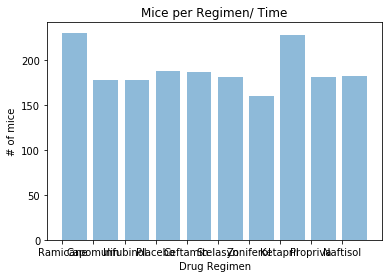

In [36]:
plt.bar(x_axis, mice_time, alpha = .5, align ='edge')

plt.title('Mice per Regimen/ Time')

plt.xlabel('Drug Regimen')

plt.ylabel('# of mice')



## Pie Plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

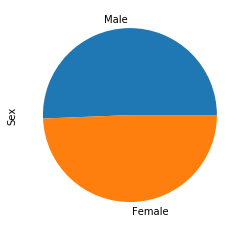

In [75]:
clean_df['Sex'].value_counts().plot.pie()



Text(0.5, 1.0, 'Sex of Mice')

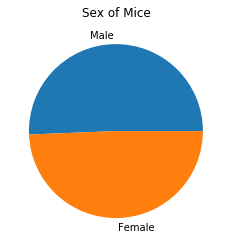

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mice = clean_df['Sex'].value_counts()

labels = ['Male', 'Female']

plt.pie(sex_mice, labels = labels)
plt.title('Sex of Mice')




## Quartiles, Outliers and Boxplots

Text(0.5, 1.0, 'Top Regimens')

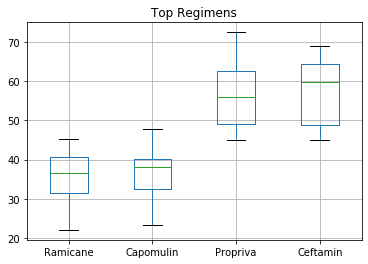

In [37]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 



def drug_frame(drug):
    
    tumor_size = []

    thing = pd.DataFrame(clean_df.loc[clean_df['Drug Regimen']== drug])


    for i in range(len(thing)):

   
        if thing.iloc[i,0] != thing.iloc[i-1, 0]:
        
            that = thing.iloc[i-1, 6]
        
            mice_names = thing.iloc[i-1, 0]
            
            tumor_size.append(that)
            
            outlier = st.iqr(that)
            
    return(tumor_size)      
        



boxy ={ 'Ramicane': drug_frame('Ramicane'), 'Capomulin': drug_frame('Capomulin'), 'Propriva': drug_frame('Propriva'), 'Ceftamin':drug_frame('Ceftamin')}

box_df = pd.DataFrame(boxy)

box_df.boxplot()

plt.title('Top Regimens')



In [98]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Size')

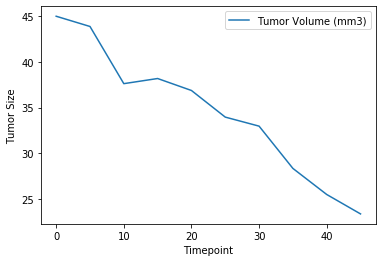

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap = pd.DataFrame(clean_df.loc[clean_df['Drug Regimen']== 'Capomulin'])

cap1 = pd.DataFrame(cap.loc[cap['Mouse ID']== 's185'])

cap1.plot('Timepoint', 'Tumor Volume (mm3)')


plt.ylabel('Tumor Size')


In [264]:
thing = pd.DataFrame(cap.groupby('Mouse ID').mean())



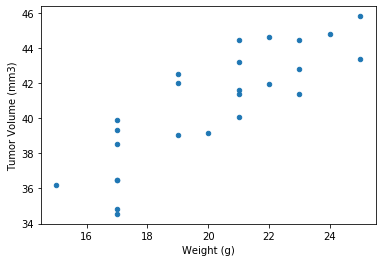

In [267]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

thing.plot.scatter( x = 'Weight (g)' , y = 'Tumor Volume (mm3)')

## Correlation and Regression

In [284]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

this = st.pearsonr(thing['Weight (g)'], thing['Tumor Volume (mm3)'])[0]

that_again = st.linregress(thing['Weight (g)'], thing['Tumor Volume (mm3)'])



LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)